In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
# Input data files
train = pd.read_csv('/content/drive/My Drive/dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/dataset/test.csv')

In [ ]:
# Format date
train["Date"] = train["Date"].apply(lambda x: x.replace("/",""))
train["Date"]  = train["Date"].astype(int)
train.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
train.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
6276,6277,140920,8:00 AM,Telengana,-,-,127007,974,158513
6277,6278,140920,8:00 AM,Tripura,-,-,11536,200,19165
6278,6279,140920,8:00 AM,Uttarakhand,-,-,21040,414,31973
6279,6280,140920,8:00 AM,Uttar Pradesh,-,-,239485,4429,312036
6280,6281,140920,8:00 AM,West Bengal,-,-,175139,3945,202708


In [ ]:
train.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,300120,6:00 PM,Kerala,1,0,0,0,1
1,2,310120,6:00 PM,Kerala,1,0,0,0,1
2,3,10220,6:00 PM,Kerala,2,0,0,0,2
3,4,20220,6:00 PM,Kerala,3,0,0,0,3
4,5,30220,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
# drop nan's
train = train.drop(['ConfirmedForeignNational'],axis=1)
train = train.drop(['Time'],axis=1)
train = train.drop(['ConfirmedIndianNational'],axis=1)
train = train.drop(['Cured'],axis=1)
train = train.dropna()
train.isnull().sum()

Sno                     0
Date                    0
State/UnionTerritory    0
Deaths                  0
Confirmed               0
dtype: int64

In [ ]:
# Do same to Test data
test["Date"] = test["Date"].apply(lambda x: x.replace("/",""))
test["Date"]  = test["Date"].astype(int)
test.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:

test = test.drop(['ConfirmedForeignNational'],axis=1)
test = test.drop(['Time'],axis=1)
test = test.drop(['ConfirmedIndianNational'],axis=1)
test = test.drop(['Cured'],axis=1)
test = test.drop(['Deaths'],axis=1)
test = test.drop(['Confirmed'],axis=1)
test = test.dropna()
test.head()

,Sno,Date,State/UnionTerritory
0,1,300120,Kerala
1,2,310120,Kerala
2,3,10220,Kerala
3,4,20220,Kerala
4,5,30220,Kerala


In [ ]:
#Prepare Training
x = train[[ 'Date']]
y1 = train[['Confirmed']]
y2 = train[['Deaths']]
x_test = test[['Date']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Tree_model = RandomForestClassifier(max_depth=200, random_state=0)

In [ ]:
#Train Confirmed Cases Tree
Tree_model.fit(x,y1)
pred1 = Tree_model.predict(x_test)
pred1 = pd.DataFrame(pred1)
pred1.columns = ["Confirmed_prediction"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
pred1.head()

,Confirmed_prediction
0,1
1,1
2,2
3,3
4,3


In [ ]:
#Train Deaths Tree
Tree_model.fit(x,y2)
pred2 = Tree_model.predict(x_test)
pred2 = pd.DataFrame(pred2)
pred2.columns = ["Death_prediction"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
pred2.tail()

,Death_prediction
6276,10
6277,10
6278,10
6279,10
6280,10


In [ ]:
#Prepare for Submission
submission = pd.read_csv('/content/drive/My Drive/dataset/submission.csv')

In [ ]:
# submit
Sub = pd.read_csv('/content/drive/My Drive/dataset/submission.csv')
sub_new = Sub[["Sno"]]
sub_new

,Sno
0,1
1,2
2,3
3,4
4,5
...,...
6276,6277
6277,6278
6278,6279
6279,6280


In [ ]:
submit = pd.concat([pred1,pred2,sub_new],axis=1)
submit.head()

,Confirmed_prediction,Death_prediction,Sno
0,1,0,1
1,1,0,2
2,2,0,3
3,3,0,4
4,3,0,5


In [ ]:
# Clean
submit.columns = ['Confirmed_prediction', 'Deaths_prediction', 'ID']
submit = submit[['ID','Confirmed_prediction', 'Deaths_prediction']]

In [ ]:
submit["Confirmed_prediction"] = submit["Confirmed_prediction"].astype(int)

In [ ]:
submit["Deaths_prediction"] = submit["Deaths_prediction"].astype(int)

In [ ]:
submit.describe()

,ID,Confirmed_prediction,Deaths_prediction
count,6281.000000,6281.000000,6281.000000
mean,3141.000000,22907.771692,152.782996
std,1813.312852,63707.439773,755.176649
min,1.000000,1.000000,0.000000
25%,1571.000000,1.000000,0.000000
50%,3141.000000,282.000000,0.000000
75%,4711.000000,13370.000000,2.000000
max,6281.000000,469256.000000,7925.000000


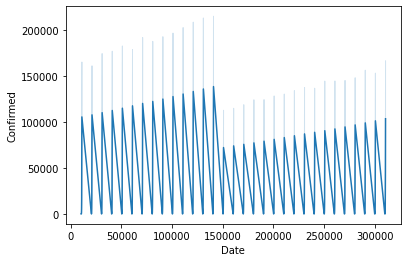

In [ ]:
#confirmed pred
sns.lineplot(x="Date", y="Confirmed",data=train)

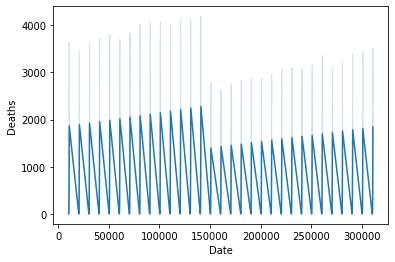

In [ ]:
# death_pred
sns.lineplot(x="Date", y="Deaths",data=train)

In [ ]:
#import predicted file
pred1=pd.read_csv('/content/drive/My Drive/dataset/train.csv')

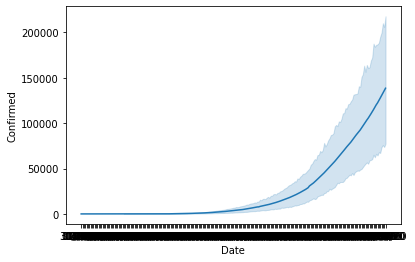

In [ ]:
#confirmed pred
sns.lineplot(x="Date", y="Confirmed",data=pred1)

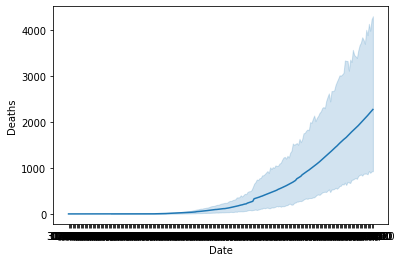

In [ ]:
# death pred
sns.lineplot(x="Date", y="Deaths",data=test1)